In [2]:
import os
from PIL import Image, ImageOps

In [3]:
path='/kaggle/input/utkface-new/UTKFace/'
dirs = os.listdir(path)
print( len(dirs) )

23708


In [4]:
images = []
ages = []
genders = []

for i in os.listdir(path)[:8000]:
    split = i.split('_')
    ages.append(int(split[0]))
    genders.append(int(split[1]))
    images.append(Image.open(path + i))

In [5]:
import pandas as pd
import numpy as np

In [6]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')
genders = pd.Series(list(genders), name = 'Genders')

df = pd.concat([images, ages, genders], axis=1)
df

,Images,Ages,Genders
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,26,0
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,22,1
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,21,1
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,28,0
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,17,1
...,...,...,...
7995,<PIL.JpegImagePlugin.JpegImageFile image mode=...,63,1
7996,<PIL.JpegImagePlugin.JpegImageFile image mode=...,30,0
7997,<PIL.JpegImagePlugin.JpegImageFile image mode=...,20,0
7998,<PIL.JpegImagePlugin.JpegImageFile image mode=...,34,0


26 0


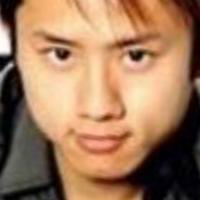

In [7]:
print(df['Ages'][0], df['Genders'][0])
display(df['Images'][0])

In [8]:
x = []
y = []

for i in range(len(df)):
    df['Images'].iloc[i].resize((200,200), Image.Resampling.LANCZOS)
    ar = np.asarray(df['Images'].iloc[i])
    x.append(ar)
    agegen = [int(df['Ages'].iloc[i]), int(df['Genders'].iloc[i])]
    y.append(agegen)
x = np.array(x)

In [9]:
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [10]:
y_age = df['Ages']
y_gender = df['Genders']

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.2)

In [11]:
genmodel = Sequential()
genmodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(64, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(128, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Flatten())
genmodel.add(Dense(64, activation='relu'))
genmodel.add(Dropout(0.5))
genmodel.add(Dense(1, activation='sigmoid'))

genmodel.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(learning_rate=0.0001),
             metrics=['accuracy'])

In [12]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train2 = datagen.flow(x_train_gender, y_train_gender, batch_size=64)

test2 = test_datagen.flow(
        x_test_gender, y_test_gender,
        batch_size=64)

history2 = genmodel.fit(train2, epochs=100, shuffle=True, validation_data=test2)

Epoch 1/100
100/100 [==============================] - 61s 542ms/step - loss: 0.6587 - accuracy: 0.6134 - val_loss: 0.6180 - val_accuracy: 0.6869
Epoch 2/100
100/100 [==============================] - 57s 571ms/step - loss: 0.6046 - accuracy: 0.6803 - val_loss: 0.5423 - val_accuracy: 0.7319
Epoch 3/100
100/100 [==============================] - 54s 541ms/step - loss: 0.5587 - accuracy: 0.7267 - val_loss: 0.4866 - val_accuracy: 0.7725
Epoch 4/100
100/100 [==============================] - 53s 533ms/step - loss: 0.5290 - accuracy: 0.7456 - val_loss: 0.4726 - val_accuracy: 0.7769
Epoch 5/100
100/100 [==============================] - 54s 540ms/step - loss: 0.4987 - accuracy: 0.7600 - val_loss: 0.4440 - val_accuracy: 0.7937
Epoch 6/100
100/100 [==============================] - 54s 542ms/step - loss: 0.4870 - accuracy: 0.7734 - val_loss: 0.4255 - val_accuracy: 0.7956
Epoch 7/100
100/100 [==============================] - 53s 527ms/step - loss: 0.4707 - accuracy: 0.7848 - val_loss: 0.4186 -

In [13]:
genmodel.save("/kaggle/working/Model/genderModel.h5")